In [3]:
from accretion_disks.shakurasunyaevdisk import ShakuraSunyaevDisk
from accretion_disks.diskwithoutflows import CompositeDisk
from accretion_disks.compact_object import CompactObject
import numpy as np

## Define compact object

In [4]:
co = CompactObject(10, a=0.5)

## SS73 disk (zona A i.e. radiation pressure dominated)

Maximum energy released occurs at 2.25 with H/R = 0.22
Total disk luminosity 0.50 LEdd


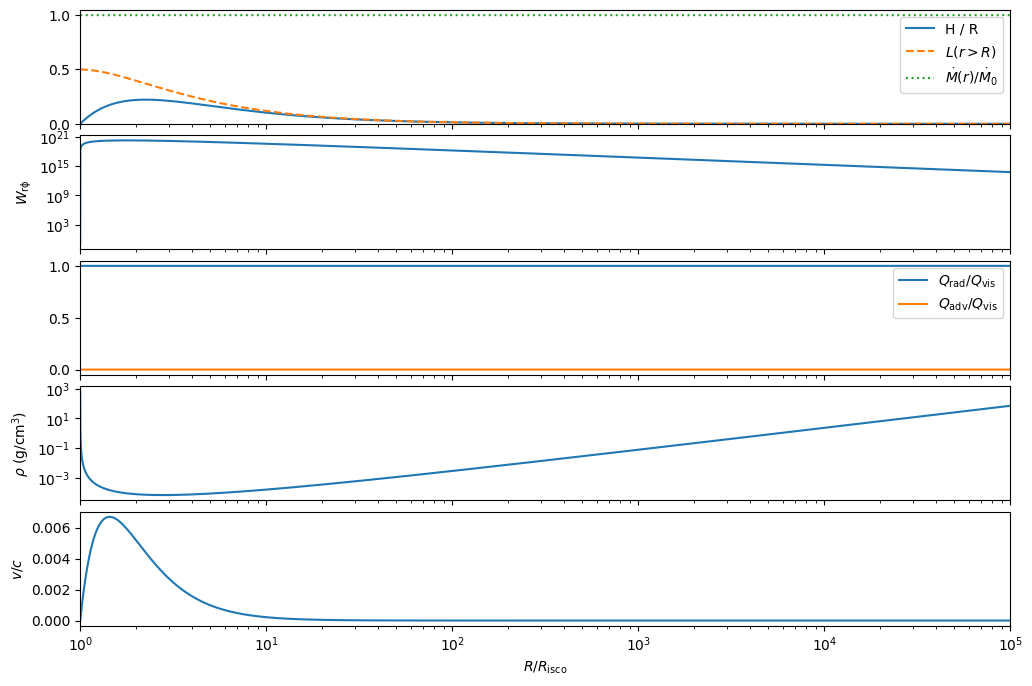

In [5]:
disk = ShakuraSunyaevDisk(co, mdot=0.5, alpha=0.1, Wrphi_in=-0.1, N=100000)
fig, axes = disk.plot()

maxQ = np.argmax(disk.Qrad * disk.R**2)
print("Maximum energy released occurs at", f"{disk.R[maxQ] / disk.CO.Risco:.2f}", f"with H/R = {disk.H[maxQ]/disk.R[maxQ]:.2f}")

print(f"Total disk luminosity {disk.L() / co.LEdd:.2f} LEdd")

## Disk with Outflows from Lipunva 1999 (inner disk has mass loss, outer disk is modified SS733)

Rsph is defined as R such that L(R>Rsph) = LEdd

Rsph = 1619.0 x mdot
Maximum energy released occurs at 1619.28 with H/R = 0.62
Total disk luminosity 5.31 LEdd


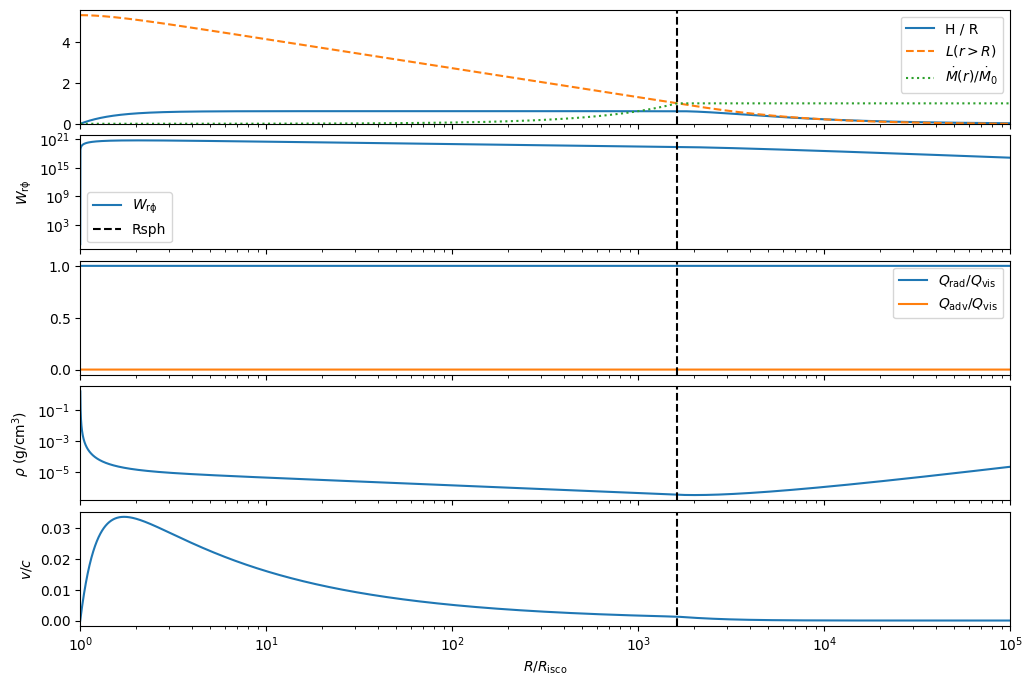

In [7]:
disk = CompositeDisk(CO=co, mdot=1000, alpha=0.1, N=10000)
fig, axes = disk.plot()
print(f"Rsph = {disk.Rsph / disk.CO.Risco:.1f} x mdot")

maxQ = np.argmax(disk.Qrad * disk.R**2)
print("Maximum energy released occurs at", f"{disk.R[maxQ] / disk.CO.Risco:.2f}", f"with H/R = {disk.H[maxQ]/disk.R[maxQ]:.2f}")


print(f"Total disk luminosity {disk.L() / co.LEdd:.2f} LEdd")
# if we integrate the disk up to Rsph we find it is equal to LEdd, as expected
np.testing.assert_almost_equal(disk.L(Rmin=disk.Rsph) / co.LEdd, 1, decimal=1)